# Phase 3 Project

Student name: Beth Mithamo

Student pace: Part Time

Scheduled project review date/time: 2/10/2023

Instructor name: Asha Deen/ Noah Kandie

# Business Understanding
An asset based credit lending company,that offers vehicle loans has contracted us, to predict the rate of loan default, based on their existing customer history.They need to create a better credit risk scoring model, to minimize the default rate to less than 10% of their portfolio.

The dataset is of loans given for motorvehicles. We have been tasked with building an asset loan default prediction, for motorvehicles based on the given dataset. We will be predicting the rate of default using the Logistic Regression, Decision Trees and Random Forest predictive models.
Our target variable,rate of loan default, is  based on KYC(Know Your Customer) data collected on the loan borrowers. This data includes the borrower's personal information, employment status and credit status. 

The 5C's are often used when accessing credit worthiness, which are Capital, Capacity, Collateral, Character and Conditions.



## Import Libraries

In [1]:
#import libraries for loading and cleaning data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the Data

In [2]:
#Load data
#Our vehicle loan data is provided in csv format, stored locally
df = pd.read_csv("C:/Users/Home/Desktop/vehicle_loans.csv", index_col = 'UNIQUEID')

In [3]:
#get loan_df head
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
#Investigate shape
df.shape

(233154, 40)

In [5]:
#capitalize column headers to create a neater looking df
df.columns = df.columns.str.capitalize()
df.head()

,Disbursed_amount,Asset_cost,Ltv,Branch_id,Supplier_id,Manufacturer_id,Current_pincode_id,Date_of_birth,Employment_type,Disbursal_date,...,Sec_sanctioned_amount,Sec_disbursed_amount,Primary_instal_amt,Sec_instal_amt,New_accts_in_last_six_months,Delinquent_accts_in_last_six_months,Average_acct_age,Credit_history_length,No_of_inquiries,Loan_default
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [6]:
#Investigate column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Disbursed_amount                     233154 non-null  int64  
 1   Asset_cost                           233154 non-null  int64  
 2   Ltv                                  233154 non-null  float64
 3   Branch_id                            233154 non-null  int64  
 4   Supplier_id                          233154 non-null  int64  
 5   Manufacturer_id                      233154 non-null  int64  
 6   Current_pincode_id                   233154 non-null  int64  
 7   Date_of_birth                        233154 non-null  object 
 8   Employment_type                      225493 non-null  object 
 9   Disbursal_date                       233154 non-null  object 
 10  State_id                             233154 non-null  int64  
 11  Employee

In [7]:
#investigate the data types distribution
df.dtypes.value_counts()

int64      33
object      6
float64     1
dtype: int64

In [8]:
#check for null values
df.isna().sum()

Disbursed_amount                          0
Asset_cost                                0
Ltv                                       0
Branch_id                                 0
Supplier_id                               0
Manufacturer_id                           0
Current_pincode_id                        0
Date_of_birth                             0
Employment_type                        7661
Disbursal_date                            0
State_id                                  0
Employee_code_id                          0
Mobileno_avl_flag                         0
Aadhar_flag                               0
Pan_flag                                  0
Voterid_flag                              0
Driving_flag                              0
Passport_flag                             0
Perform_cns_score                         0
Perform_cns_score_description             0
Pri_no_of_accts                           0
Pri_active_accts                          0
Pri_overdue_accts               

In [9]:
#dataset summary statistics
df.describe()

,Disbursed_amount,Asset_cost,Ltv,Branch_id,Supplier_id,Manufacturer_id,Current_pincode_id,State_id,Employee_code_id,Mobileno_avl_flag,...,Sec_overdue_accts,Sec_current_balance,Sec_sanctioned_amount,Sec_disbursed_amount,Primary_instal_amt,Sec_instal_amt,New_accts_in_last_six_months,Delinquent_accts_in_last_six_months,No_of_inquiries,Loan_default
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


# Target Variable

In [10]:
#Investigate our target variable
df.Loan_default.value_counts()

0    182543
1     50611
Name: Loan_default, dtype: int64

In [11]:
df.Loan_default.value_counts(normalize=True)

0    0.782929
1    0.217071
Name: Loan_default, dtype: float64

According to the data, there is a 21% default rate. Our goal is to create a predictive model that will decrease this rate to 10%

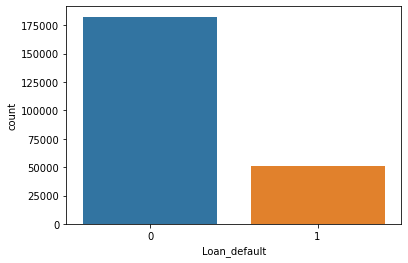

In [12]:
#visualize the loan_default dataframe
sns.countplot(x="Loan_default", data=df)
plt.show()

# Exploratory Data Analysis

## Handling missing values

In [13]:
#check for missing values in the employment type
df['Employment_type'].isna().value_counts()

False    225493
True       7661
Name: Employment_type, dtype: int64

Self employed    127635
Salaried          97858
Name: Employment_type, dtype: int64


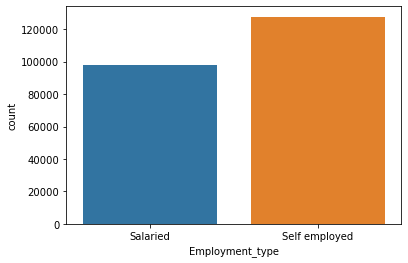

In [14]:
#The only column with missing values was the Employment type column
#We will investigate this further with a couple of visualizations and metrics
print(df['Employment_type'].value_counts())
sns.countplot(x='Employment_type', data=df)
plt.show()

In [15]:
df['Employment_type'].value_counts(normalize=True)


Self employed    0.566026
Salaried         0.433974
Name: Employment_type, dtype: float64

In [16]:
#Fill missing values with a placeholder
df = df.fillna(value={'Employment_type' : 'Missing'})

In [17]:
#Check for null values on the employment column again
df.Employment_type.isna().sum()

0

Self employed    127635
Salaried          97858
Missing            7661
Name: Employment_type, dtype: int64


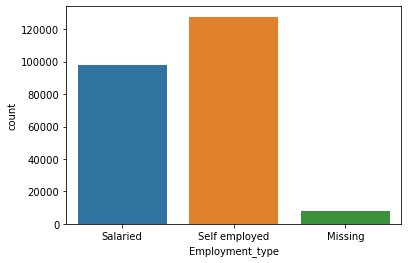

In [18]:
#Plot employment type with the additional mising value
print(df['Employment_type'].value_counts())
sns.countplot(x="Employment_type", data=df)
plt.show()

In [19]:
#Investigate the rate of default based on the employment type
df.groupby('Employment_type')['Loan_default'].value_counts().unstack(level=1)

Loan_default,0,1
Employment_type,,
Missing,6017,1644
Salaried,77948,19910
Self employed,98578,29057


In [20]:
#check the percentages
df.groupby('Employment_type')['Loan_default'].value_counts(normalize=True).unstack(level=1)

Loan_default,0,1
Employment_type,,
Missing,0.785407,0.214593
Salaried,0.796542,0.203458
Self employed,0.772343,0.227657


## Calculate the borrower's age, which is a loan default determinant

In [21]:
#covert disbursal date to datetime data type
df['Disbursal_date'] = pd.to_datetime(df['Disbursal_date'])

#Age is often associated with loa default
df[['Disbursal_date', 'Date_of_birth']].sample(10)

,Disbursal_date,Date_of_birth
UNIQUEID,,
430323,2018-10-08,04-08-1982
610255,2018-10-24,11-12-1989
651250,2018-10-31,01-01-1994
469769,2018-08-28,11-06-1976
544579,2018-09-28,14-02-1991
639200,2018-10-29,11-04-1990
486268,2018-08-31,15-06-1990
453516,2018-08-21,15-01-1999
597212,2018-10-22,07-11-1989


In [22]:
#convert columns of Date of birth and Disbursal date to datetime data type
df['Date_of_birth'] = pd.to_datetime(df['Date_of_birth'])
df['Disbursal_date'] = pd.to_datetime(df['Disbursal_date'])

#calculate the borrowers age at the time of disbursal
df['Age'] = df['Disbursal_date'] - df['Date_of_birth']
df['Age'] = df['Age'] // np.timedelta64(1, 'Y')

#Inspect the results
print(df[['Date_of_birth', 'Age', 'Disbursal_date']].sample(n=10))

         Date_of_birth  Age Disbursal_date
UNIQUEID                                  
620538      1988-02-02   30     2018-10-25
624176      1979-01-06   39     2018-10-26
594017      1969-09-15   49     2018-10-21
568176      1998-06-23   20     2018-10-10
526900      1995-12-31   22     2018-09-21
506565      1984-03-15   34     2018-09-14
539451      1977-01-10   41     2018-09-26
539448      1976-12-31   41     2018-09-26
420439      1995-01-01   23     2018-03-08
563035      1991-02-05   27     2018-08-10


In [23]:
#Investigate the age statistics 
print(df.Age.describe()) 
print('\nAge of youngest borrower:',df.Age.min())
print('Age of oldest borrower:',df.Age.max())
print('Median Age:',df.Age.median())

count    233154.000000
mean         33.902871
std           9.829475
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: Age, dtype: float64

Age of youngest borrower: 17
Age of oldest borrower: 69
Median Age: 32.0


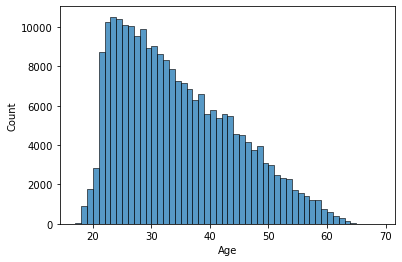

In [24]:
#Plot the Age distribution
sns.histplot(x="Age", data=df, bins=52)
plt.show()

The distribution is right skewed

In [25]:
#age summary grouped by loan default
df.groupby('Age')['Loan_default'].value_counts(normalize=True).unstack(level=1)

Loan_default,0,1
Age,,
17,0.704918,0.295082
18,0.751087,0.248913
19,0.764205,0.235795
20,0.744628,0.255372
21,0.746958,0.253042
22,0.758779,0.241221
23,0.763095,0.236905
24,0.770906,0.229094
25,0.769573,0.230427


The loan default rate slightly decreases, with the older age groups. 

<AxesSubplot:xlabel='Loan_default', ylabel='Age'>

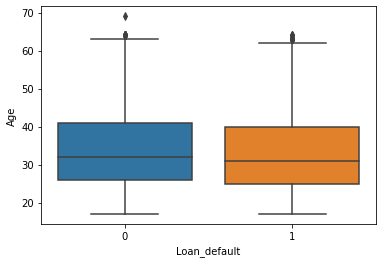

In [26]:
sns.boxplot(x ="Loan_default",y="Age" ,data = df)

In [27]:
#create a column disbursal month 
#Investigate number of loans disbursed per month
df['Disbursal_month'] = df['Disbursal_date'].dt.month
df['Disbursal_month'].value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: Disbursal_month, dtype: int64

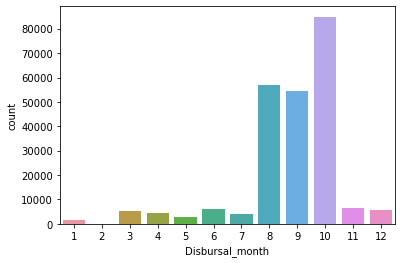

In [28]:
#visualize the rate of disbursment per month
sns.countplot(x="Disbursal_month", data=df)
plt.show()

The 10th month, October had the highest loan disbursementsat 84,875 while the 2nd month of February had the least at only 25.
Most loans are disbursed between the months of August, September and October

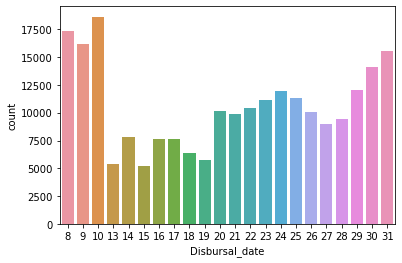

In [29]:
#plot the day of disbursal for further analysis. 
day_of_disbursal = df['Disbursal_date'].dt.day
day_of_disbursal.value_counts()
sns.countplot(x= day_of_disbursal , data=df)
plt.show()

Another, interesting fact, it seems that loans are not disbursed in the first week(s) of the months

In [30]:
# Convert credit history length and average account age from object to integers 
df[['Credit_history_length', 'Average_acct_age']]

,Credit_history_length,Average_acct_age
UNIQUEID,,
420825,0yrs 0mon,0yrs 0mon
537409,1yrs 11mon,1yrs 11mon
417566,0yrs 0mon,0yrs 0mon
624493,1yrs 3mon,0yrs 8mon
539055,0yrs 0mon,0yrs 0mon
...,...,...
626432,3yrs 3mon,1yrs 9mon
606141,0yrs 6mon,0yrs 6mon
613658,0yrs 0mon,0yrs 0mon


In [31]:
# Extract number of months from Average_acct_age with both months and years, and create a new column
def calc_months(str_list):  
    years = int(str_list[0])
    months = int(str_list[1])

    num_months = (years * 12) + months
    return num_months

df['Average_acct_age_months'] = df['Average_acct_age'].str.findall('\d+')

df['Average_acct_age_months'] = df['Average_acct_age_months'].map(calc_months)

df[['Average_acct_age_months', 'Average_acct_age']].sample(n=10)

,Average_acct_age_months,Average_acct_age
UNIQUEID,,
576664,4,0yrs 4mon
500829,0,0yrs 0mon
628832,0,0yrs 0mon
585005,0,0yrs 0mon
615921,13,1yrs 1mon
581251,0,0yrs 0mon
441813,0,0yrs 0mon
600038,2,0yrs 2mon
643508,10,0yrs 10mon


In [32]:
# Extract number of months from Credit history length with both months and years, and create a new column
def convert_str_to_months(col_name):
    new_col = col_name + '_months'
    df[new_col] = df[col_name].str.findall('\d+')
    df[new_col] = df[new_col].map(calc_months)
    
convert_str_to_months('Credit_history_length')

df[['Credit_history_length_months', 'Credit_history_length']].sample(n=5)

,Credit_history_length_months,Credit_history_length
UNIQUEID,,
455614,0,0yrs 0mon
513992,30,2yrs 6mon
582100,28,2yrs 4mon
648805,13,1yrs 1mon
466633,0,0yrs 0mon


In [33]:
#check for the unique values in each column, to consider which columns are relevant
df.nunique()

Disbursed_amount                       24565
Asset_cost                             46252
Ltv                                     6579
Branch_id                                 82
Supplier_id                             2953
Manufacturer_id                           11
Current_pincode_id                      6698
Date_of_birth                          15433
Employment_type                            3
Disbursal_date                            84
State_id                                  22
Employee_code_id                        3270
Mobileno_avl_flag                          1
Aadhar_flag                                2
Pan_flag                                   2
Voterid_flag                               2
Driving_flag                               2
Passport_flag                              2
Perform_cns_score                        573
Perform_cns_score_description             20
Pri_no_of_accts                          108
Pri_active_accts                          40
Pri_overdu

In [34]:
#Investigate the numerous id columns in the dataset, to determine, which should be dropped
df[['Branch_id','Current_pincode_id','Employee_code_id','Manufacturer_id','Supplier_id','State_id']]

,Branch_id,Current_pincode_id,Employee_code_id,Manufacturer_id,Supplier_id,State_id
UNIQUEID,,,,,,
420825,67,1441,1998,45,22807,6
537409,67,1502,1998,45,22807,6
417566,67,1497,1998,45,22807,6
624493,67,1501,1998,45,22807,6
539055,67,1495,1998,45,22807,6
...,...,...,...,...,...,...
626432,34,1050,3705,48,20700,6
606141,34,990,3705,51,23775,6
613658,77,2299,3479,86,22186,4


In [35]:
#drop irrelevant columns, 
#id columns with very high unique values
df.drop(columns = ['Average_acct_age',
                   'Credit_history_length',
                   'Disbursal_date','Date_of_birth',
                   'Branch_id',
                   'Supplier_id',
                   'Current_pincode_id',
                   'Employee_code_id',
                   'Mobileno_avl_flag'], axis = 1, inplace= True)
df.nunique()

Disbursed_amount                       24565
Asset_cost                             46252
Ltv                                     6579
Manufacturer_id                           11
Employment_type                            3
State_id                                  22
Aadhar_flag                                2
Pan_flag                                   2
Voterid_flag                               2
Driving_flag                               2
Passport_flag                              2
Perform_cns_score                        573
Perform_cns_score_description             20
Pri_no_of_accts                          108
Pri_active_accts                          40
Pri_overdue_accts                         22
Pri_current_balance                    71341
Pri_sanctioned_amount                  44390
Pri_disbursed_amount                   47909
Sec_no_of_accts                           37
Sec_active_accts                          23
Sec_overdue_accts                          9
Sec_curren

In [36]:
#Investigate if the deafult rate may be determined by the vehicle manufacturer
df.groupby('Manufacturer_id').describe()

Disbursed_amount                                          \
                           count           mean            std       min   
Manufacturer_id                                                            
45                       56626.0   49201.774679    8634.593648   13320.0   
48                       16710.0   58766.882944   16671.065250   13640.0   
49                       10220.0   60575.478767   17039.885687   14839.0   
51                       27204.0   54644.316351   14135.225829   13664.0   
67                        2405.0   98024.459044   18618.106027   29431.0   
86                      109534.0   54334.505788    9812.247895   13600.0   
120                       9658.0   57741.254815   11258.954283   15442.0   
145                        778.0   64531.194087   11776.351429   22294.0   
152                          6.0  442041.000000  302141.006435  196998.0   
153                         12.0   91358.166667    5979.646779   82166.0   
156                          1.0  987354.000000            NaN  987354.0   

                                                          Asset_cost  \
                       25%       50%        75%       max      count   
Manufacturer_id                                                        
45                44349.00   49828.0   54759.00  105768.0    56626.0   
48                45649.00   59713.0   70342.25  167447.0    16710.0   
49                49043.25   57259.0   71123.00  332045.0    10220.0   
51                44909.00   54303.0   65169.00  191392.0    27204.0   
67                90137.00   95800.0  107802.00  190887.0     2405.0   
86                48803.00   54759.0   59971.75  166972.0   109534.0   
120               50704.50   57000.0   64328.25  117227.0     9658.0   
145               57953.75   64270.5   71317.00   96899.0      778.0   
152              257310.25  317218.5  523978.25  990572.0        6.0   
153               87444.25   92011.5   96608.75   98480.0       12.0   
156              987354.00  987354.0  987354.00  987354.0        1.0   

                               ... Average_acct_age_months         \
                         mean  ...                     75%    max   
Manufacturer_id                ...                                  
45               6.702615e+04  ...                   11.00  197.0   
48               8.963367e+04  ...                   11.00  192.0   
49               9.517198e+04  ...                   10.00  195.0   
51               8.018461e+04  ...                   13.00  185.0   
67               1.641947e+05  ...                   20.00  214.0   
86               7.283501e+04  ...                   14.00  369.0   
120              8.133649e+04  ...                   14.00  182.0   
145              9.661251e+04  ...                   15.00  161.0   
152              6.453312e+05  ...                   43.25   70.0   
153              1.943157e+05  ...                    2.00   57.0   
156              1.328954e+06  ...                    9.00    9.0   

                Credit_history_length_months                              \
                                       count       mean        std   min   
Manufacturer_id                                                            
45                                   56626.0  13.797037  25.693429   0.0   
48                                   16710.0  13.545781  25.996435   0.0   
49                                   10220.0  12.748532  25.382984   0.0   
51                                   27204.0  17.132113  29.928676   0.0   
67                                    2405.0  23.020374  32.847945   0.0   
86                                  109534.0  17.523673  29.593876   0.0   
120                                   9658.0  20.046386  32.556934   0.0   
145                                    778.0  21.114396  35.797745   0.0   
152                                      6.0  66.500000  38.914008   0.0   
153                                     12.0   6.750000  16.657

In [37]:
#explore the rate of loan default based on the maunfacturer
df.groupby('Manufacturer_id')['Loan_default'].value_counts().unstack(level=1)

Loan_default,0,1
Manufacturer_id,,
45,43687.0,12939.0
48,12156.0,4554.0
49,7984.0,2236.0
51,21547.0,5657.0
67,1882.0,523.0
86,87124.0,22410.0
120,7526.0,2132.0
145,622.0,156.0
152,6.0,NaN


Manufacturer 86 had the highest loan default rate, and also the highest number of loans disbursed.

In [38]:
#explore the rate of loan default based on the maunfacturer
df.groupby('Manufacturer_id')['Loan_default'].value_counts(normalize=True).unstack(level=1)

Loan_default,0,1
Manufacturer_id,,
45,0.771501,0.228499
48,0.727469,0.272531
49,0.781213,0.218787
51,0.792053,0.207947
67,0.782536,0.217464
86,0.795406,0.204594
120,0.779250,0.220750
145,0.799486,0.200514
152,1.000000,NaN


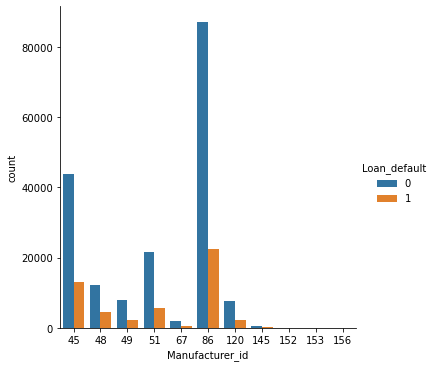

In [39]:
sns.catplot(data=df, kind='count', x='Manufacturer_id',hue= 'Loan_default');

# Feature Engineering

In [40]:
#create a function to explore categorical data:
def explore_categorical(col_name):   
    print("{0} Summary".format(col_name))
    print("\n")

    print("{0} Counts".format(col_name))
    print(df[col_name].value_counts())
    print("\n")

    print("{0} Ratio".format(col_name))
    print(df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(df.groupby(col_name)['Loan_default'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio".format(col_name))
    print(df.groupby(col_name)['Loan_default'].value_counts(normalize=True).unstack(level=-1))
    print("\n")
    
    sns.catplot(data=df,kind='count',x=col_name,hue='Loan_default')
    plt.show()


In [41]:
#create a function to explore continuous data:
def explore_continuous(col_name):
    #print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(df[col_name].describe())
    print("\n")

    #Look at boxplot
    sns.boxplot(x=col_name, data=df)
    plt.show()

    #Look at the distribution
    sns.distplot(df[col_name], hist=False)
    plt.show()

    #Now lets look deeper by grouping with the target variable 
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(df.groupby('Loan_default')[col_name].describe())

    #look at grouped boxplot 
    sns.boxplot(x=col_name, y='Loan_default', data=df, orient="h")
    plt.show()

In [42]:
#Binning
#Change disbursed amount to a categorical column by creating bins

disbursed_buckets = [13000, 30000, 45000, 60000, 75000, 150000, 1000000]
disbursed_labels = ['13k - 30k', '30k - 45k', '45k - 60k', '60k - 75k', '75k - 150k', '150k - 1m']

df['Disbursed_cat'] = pd.cut(df['Disbursed_amount'], disbursed_buckets, labels=disbursed_labels)
df['Disbursed_cat'].sample(10)

UNIQUEID
486532    75k - 150k
653527     60k - 75k
590452     45k - 60k
417696     45k - 60k
602501     30k - 45k
637445     45k - 60k
514129     45k - 60k
522940     45k - 60k
644212     45k - 60k
568825     45k - 60k
Name: Disbursed_cat, dtype: category
Categories (6, object): ['13k - 30k' < '30k - 45k' < '45k - 60k' < '60k - 75k' < '75k - 150k' < '150k - 1m']

Disbursed_cat Summary


Disbursed_cat Counts
45k - 60k     126904
60k - 75k      49824
30k - 45k      40626
75k - 150k     10871
13k - 30k       4865
150k - 1m         64
Name: Disbursed_cat, dtype: int64


Disbursed_cat Ratio
45k - 60k     0.544293
60k - 75k     0.213696
30k - 45k     0.174245
75k - 150k    0.046626
13k - 30k     0.020866
150k - 1m     0.000274
Name: Disbursed_cat, dtype: float64


Disbursed_cat Default Counts
Loan_default       0      1
Disbursed_cat              
13k - 30k       4207    658
30k - 45k      34323   6303
45k - 60k      98830  28074
60k - 75k      37056  12768
75k - 150k      8070   2801
150k - 1m         57      7


Disbursed_cat Default Ratio
Loan_default          0         1
Disbursed_cat                    
13k - 30k      0.864748  0.135252
30k - 45k      0.844853  0.155147
45k - 60k      0.778778  0.221222
60k - 75k      0.743738  0.256262
75k - 150k     0.742342  0.257658
150k - 1m      0.890625  0.109375




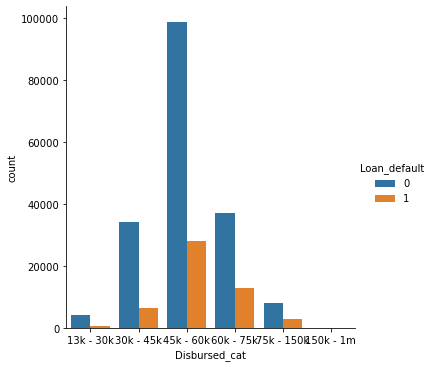

In [43]:
#explore the new binned column, Disbursed cat
explore_categorical('Disbursed_cat')

45-60K bin has the highest loan default

In [44]:
#difference between disbursed amount and asset cost may show different risk factors, lets explore more
df['Disbursal_difference'] = df['Asset_cost'] - df['Disbursed_amount']
df.head()

,Disbursed_amount,Asset_cost,Ltv,Manufacturer_id,Employment_type,State_id,Aadhar_flag,Pan_flag,Voterid_flag,Driving_flag,...,New_accts_in_last_six_months,Delinquent_accts_in_last_six_months,No_of_inquiries,Loan_default,Age,Disbursal_month,Average_acct_age_months,Credit_history_length_months,Disbursed_cat,Disbursal_difference
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,45,Salaried,6,1,0,0,0,...,0,0,0,0,34,3,0,0,45k - 60k,7822
537409,47145,65550,73.23,45,Self employed,6,1,0,0,0,...,0,1,0,1,33,9,23,23,45k - 60k,18405
417566,53278,61360,89.63,45,Self employed,6,1,0,0,0,...,0,0,0,0,32,1,0,0,45k - 60k,8082
624493,57513,66113,88.48,45,Self employed,6,1,0,0,0,...,0,0,1,1,24,10,8,15,45k - 60k,8600
539055,52378,60300,88.39,45,Self employed,6,1,0,0,0,...,0,0,1,1,41,9,0,0,45k - 60k,7922


In [45]:
#We have more columns that we should drop
#Condense the primary and secondary accounts
df['Total_accts'] = df['Pri_no_of_accts'] + df['Sec_no_of_accts']
df['Total_active_accts'] = df['Pri_active_accts'] + df['Sec_active_accts']
df['Total_overdue_accts'] = df['Pri_overdue_accts'] + df['Sec_overdue_accts']
df['Total_current_accts'] = df['Pri_current_balance'] + df['Sec_current_balance']
df['Total_sanctioned_accts'] = df['Pri_sanctioned_amount'] + df['Sec_sanctioned_amount'] 
df['Total_disbursed_accts'] = df['Pri_disbursed_amount'] + df['Sec_disbursed_amount']
df['Total_instal_accts'] = df['Primary_instal_amt'] + df['Sec_instal_amt']

In [46]:
#drop the primary ad secondary columns
drop_cols = ['Pri_no_of_accts',
 'Pri_active_accts',
 'Pri_overdue_accts',
 'Pri_current_balance',
 'Pri_sanctioned_amount',
 'Pri_disbursed_amount',
 'Primary_instal_amt',
 'Sec_no_of_accts',
 'Sec_active_accts',
 'Sec_overdue_accts',
 'Sec_current_balance',
 'Sec_sanctioned_amount',
 'Sec_disbursed_amount',
 'Sec_instal_amt']

df = df.drop(drop_cols, axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   Disbursed_amount                     233154 non-null  int64   
 1   Asset_cost                           233154 non-null  int64   
 2   Ltv                                  233154 non-null  float64 
 3   Manufacturer_id                      233154 non-null  int64   
 4   Employment_type                      233154 non-null  object  
 5   State_id                             233154 non-null  int64   
 6   Aadhar_flag                          233154 non-null  int64   
 7   Pan_flag                             233154 non-null  int64   
 8   Voterid_flag                         233154 non-null  int64   
 9   Driving_flag                         233154 non-null  int64   
 10  Passport_flag                        233154 non-null  int64   


In [48]:
#create column with percentage of overdue accounts
df['Overdue_pct'] = df['Total_overdue_accts'] / df['Total_accts']
df['Overdue_pct'].sample(10)

UNIQUEID
442587         NaN
538978         NaN
617625         NaN
648330         NaN
455941    0.000000
418793    0.000000
431881    0.666667
612733    0.000000
461954    0.000000
578273    0.000000
Name: Overdue_pct, dtype: float64

In [49]:
#check fo missing values
df['Overdue_pct'].isnull().sum()

115792

In [50]:
#fill null values with 0
df['Overdue_pct'] = df['Overdue_pct'].fillna(0)

In [51]:
df['Overdue_pct'].isnull().sum()

0

In [52]:
#check the current shape of the dataframe
df.shape

(233154, 31)

# Normalization - Scaling

In [53]:
#Scale the data, to have equal influence
#only select columns of numeric data types
numeric_cols = ['Disbursed_amount', 
                'Asset_cost', 
                'Ltv',
                'New_accts_in_last_six_months',
                'Delinquent_accts_in_last_six_months', 
                'No_of_inquiries',
                'Total_accts', 
                'Total_active_accts', 
                'Total_overdue_accts',
                'Total_current_accts', 
                'Total_sanctioned_accts',
                'Total_disbursed_accts', 
                'Total_instal_accts',
                'Age',
                'Perform_cns_score',
                'Average_acct_age_months',
                'Credit_history_length_months',
                'Disbursal_difference',
                'Overdue_pct'
                  ]

In [54]:
#import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Instantiate MinMaxScaler
mm_scaler = MinMaxScaler()

In [55]:
#Fit and transform the numeric columns
df[numeric_cols] = mm_scaler.fit_transform(df[numeric_cols])

In [56]:
#visualize scaled data
df

,Disbursed_amount,Asset_cost,Ltv,Manufacturer_id,Employment_type,State_id,Aadhar_flag,Pan_flag,Voterid_flag,Driving_flag,...,Disbursed_cat,Disbursal_difference,Total_accts,Total_active_accts,Total_overdue_accts,Total_current_accts,Total_sanctioned_accts,Total_disbursed_accts,Total_instal_accts,Overdue_pct
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,0.038125,0.013442,0.935860,45,Salaried,6,1,0,0,0,...,45k - 60k,0.006029,0.000000,0.000000,0.00,0.064710,0.000000,0.000000,0.000000,0.0
537409,0.034612,0.017934,0.743792,45,Self employed,6,1,0,0,0,...,45k - 60k,0.022710,0.002208,0.006944,0.04,0.064978,0.000050,0.000050,0.000078,1.0
417566,0.040888,0.015302,0.936801,45,Self employed,6,1,0,0,0,...,45k - 60k,0.006439,0.000000,0.000000,0.00,0.064710,0.000000,0.000000,0.000000,0.0
624493,0.045222,0.018287,0.923267,45,Self employed,6,1,0,0,0,...,45k - 60k,0.007255,0.006623,0.000000,0.00,0.064710,0.000000,0.000000,0.000001,0.0
539055,0.039967,0.014636,0.922208,45,Self employed,6,1,0,0,0,...,45k - 60k,0.006187,0.000000,0.000000,0.00,0.064710,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,0.051054,0.042968,0.596563,48,Salaried,6,0,0,1,0,...,60k - 75k,0.060204,0.008830,0.020833,0.00,0.068493,0.000416,0.000416,0.000159,0.0
606141,0.061735,0.039950,0.764034,51,Self employed,6,0,0,1,0,...,60k - 75k,0.036178,0.002208,0.000000,0.00,0.064710,0.000000,0.000000,0.000061,0.0
613658,0.020633,0.021490,0.452160,86,Salaried,4,1,0,0,0,...,30k - 45k,0.053168,0.000000,0.000000,0.00,0.064710,0.000000,0.000000,0.000000,0.0


In [57]:
#look at categorical data types
category_cols = ['Manufacturer_id','State_id','Disbursal_month','Disbursed_cat','Perform_cns_score_description','Employment_type']
df[category_cols].dtypes

Manufacturer_id                     int64
State_id                            int64
Disbursal_month                     int64
Disbursed_cat                    category
Perform_cns_score_description      object
Employment_type                    object
dtype: object

In [58]:
#convert to categorical variable
df[category_cols] = df[category_cols].astype('category')
df[category_cols].dtypes

Manufacturer_id                  category
State_id                         category
Disbursal_month                  category
Disbursed_cat                    category
Perform_cns_score_description    category
Employment_type                  category
dtype: object

In [59]:
#select a few variables for the first model
#feature selection
model_1 = ['State_id', 'Ltv','Disbursed_cat','Disbursal_month','Perform_cns_score','Loan_default','Employment_type','Age',
           'Asset_cost', 'Disbursed_amount','Credit_history_length_months' ]
df_model_1 = df[model_1]
df_model_1

,State_id,Ltv,Disbursed_cat,Disbursal_month,Perform_cns_score,Loan_default,Employment_type,Age,Asset_cost,Disbursed_amount,Credit_history_length_months
UNIQUEID,,,,,,,,,,,
420825,6,0.935860,45k - 60k,3,0.000000,0,Salaried,0.326923,0.013442,0.038125,0.000000
537409,6,0.743792,45k - 60k,9,0.671910,1,Self employed,0.307692,0.017934,0.034612,0.049145
417566,6,0.936801,45k - 60k,1,0.000000,0,Self employed,0.288462,0.015302,0.040888,0.000000
624493,6,0.923267,45k - 60k,10,0.342697,1,Self employed,0.134615,0.018287,0.045222,0.032051
539055,6,0.922208,45k - 60k,9,0.000000,1,Self employed,0.461538,0.014636,0.039967,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
626432,6,0.596563,60k - 75k,10,0.825843,0,Salaried,0.250000,0.042968,0.051054,0.083333
606141,6,0.764034,60k - 75k,10,0.926966,0,Self employed,0.250000,0.039950,0.061735,0.012821
613658,4,0.452160,30k - 45k,10,0.000000,0,Salaried,0.480769,0.021490,0.020633,0.000000


In [60]:
# Separate the target variable and predictors
X = df_model_1.drop(['Loan_default'], axis=1)
y = df_model_1['Loan_default']

print(X,y)

         State_id       Ltv Disbursed_cat Disbursal_month  Perform_cns_score  \
UNIQUEID                                                                       
420825          6  0.935860     45k - 60k               3           0.000000   
537409          6  0.743792     45k - 60k               9           0.671910   
417566          6  0.936801     45k - 60k               1           0.000000   
624493          6  0.923267     45k - 60k              10           0.342697   
539055          6  0.922208     45k - 60k               9           0.000000   
...           ...       ...           ...             ...                ...   
626432          6  0.596563     60k - 75k              10           0.825843   
606141          6  0.764034     60k - 75k              10           0.926966   
613658          4  0.452160     30k - 45k              10           0.000000   
548084          4  0.459809     30k - 45k               9           0.000000   
630213          4  0.668236    75k - 150

In [61]:
#Perform a One hot encoding
ohe_df = pd.get_dummies(df_model_1, prefix_sep='_', drop_first=True)
ohe_df

,Ltv,Perform_cns_score,Loan_default,Age,Asset_cost,Disbursed_amount,Credit_history_length_months,State_id_2,State_id_3,State_id_4,...,Disbursal_month_5,Disbursal_month_6,Disbursal_month_7,Disbursal_month_8,Disbursal_month_9,Disbursal_month_10,Disbursal_month_11,Disbursal_month_12,Employment_type_Salaried,Employment_type_Self employed
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,0.935860,0.000000,0,0.326923,0.013442,0.038125,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
537409,0.743792,0.671910,1,0.307692,0.017934,0.034612,0.049145,0,0,0,...,0,0,0,0,1,0,0,0,0,1
417566,0.936801,0.000000,0,0.288462,0.015302,0.040888,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
624493,0.923267,0.342697,1,0.134615,0.018287,0.045222,0.032051,0,0,0,...,0,0,0,0,0,1,0,0,0,1
539055,0.922208,0.000000,1,0.461538,0.014636,0.039967,0.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,0.596563,0.825843,0,0.250000,0.042968,0.051054,0.083333,0,0,0,...,0,0,0,0,0,1,0,0,1,0
606141,0.764034,0.926966,0,0.250000,0.039950,0.061735,0.012821,0,0,0,...,0,0,0,0,0,1,0,0,0,1
613658,0.452160,0.000000,0,0.480769,0.021490,0.020633,0.000000,0,0,1,...,0,0,0,0,0,1,0,0,1,0


# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [63]:
#Split the target and predictor variables
X = ohe_df.drop(['Loan_default'], axis=1)
y = ohe_df['Loan_default']

print(X,y)

               Ltv  Perform_cns_score       Age  Asset_cost  Disbursed_amount  \
UNIQUEID                                                                        
420825    0.935860           0.000000  0.326923    0.013442          0.038125   
537409    0.743792           0.671910  0.307692    0.017934          0.034612   
417566    0.936801           0.000000  0.288462    0.015302          0.040888   
624493    0.923267           0.342697  0.134615    0.018287          0.045222   
539055    0.922208           0.000000  0.461538    0.014636          0.039967   
...            ...                ...       ...         ...               ...   
626432    0.596563           0.825843  0.250000    0.042968          0.051054   
606141    0.764034           0.926966  0.250000    0.039950          0.061735   
613658    0.452160           0.000000  0.480769    0.021490          0.020633   
548084    0.459809           0.000000  0.134615    0.022793          0.021426   
630213    0.668236          

In [64]:
#perfrom a train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print('X_train:', X_train.shape, '\n X_test:',X_test.shape)

X_train: (163207, 45) 
 X_test: (69947, 45)


In [65]:
#instantiate the logistic model
log_model = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear',max_iter=300)

In [66]:
#fit the logistic model
log_model.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, max_iter=300,
                   solver='liblinear')

In [67]:
#predict the model
preds = log_model.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
#get model performance accuracy
log_model.score(X_test, y_test)

0.7825067551145868

# Logistic Regression Model Evaluation

In [69]:
#evaluate the ROC Curve
probs = log_model.predict_proba(X_test)
probs

array([[0.74338092, 0.25661908],
       [0.82488967, 0.17511033],
       [0.77620741, 0.22379259],
       ...,
       [0.80077536, 0.19922464],
       [0.72086817, 0.27913183],
       [0.78049047, 0.21950953]])

In [71]:
#import model evaluation 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix#create a an evaluation metrics function, for testing our models
def eval_model(model, X_test, y_test):
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
    
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

In [73]:
#evaluate the AUC score
fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr,tpr)
roc_auc

0.6119984144571493

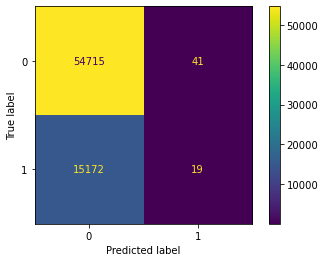



Accuracy:  0.7825067551145868
Precision:  0.31666666666666665
Recall:  0.001250740570074386
F1:  0.0024916398924660675
AUC:  0.6119984144571493


In [74]:
eval_model(log_model, X_test, y_test)

The model has not done a bad job at predicting the loan default based on the accuracy assumption

f1 score of ~0.0003 should prove beyond doubt that our model is not reliable despite the 78% accuracy

# Decision Trees

In [75]:
#Import DT Classifier
from sklearn.tree import DecisionTreeClassifier

# Train a DT classifier
dtc = DecisionTreeClassifier(random_state=10)  
dtc.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

In [76]:
#Make predictions for test data
dtc_pred = dtc.predict(X_test)  

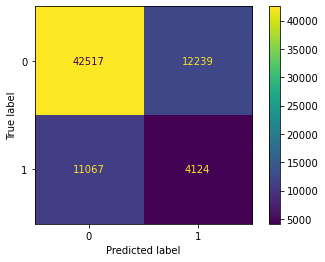



Accuracy:  0.6668048665418103
Precision:  0.2520320234675793
Recall:  0.27147653215719836
F1:  0.26139316726880907
AUC:  0.5242770779519512


In [77]:
#Check predictive performance
eval_model(dtc, X_test, y_test)

This model performed worse than the logistic model

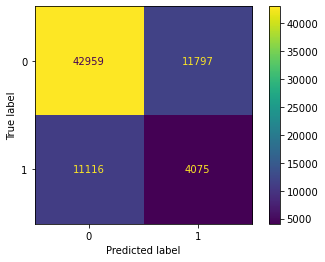



Accuracy:  0.6724234062933364
Precision:  0.2567414314516129
Recall:  0.26825093805542755
F1:  0.2623700222129221
AUC:  0.5267257199664039


In [78]:
#Regrow the tree using entropy
# Instantiate and fit a DecisionTreeClassifier
dtc_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
dtc_2.fit(X_train, y_train)

dtc_pred_2 = dtc.predict(X_test)
eval_model(dtc_2, X_test, y_test)

The model performance improvement is negligible

C:\Users\Home\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


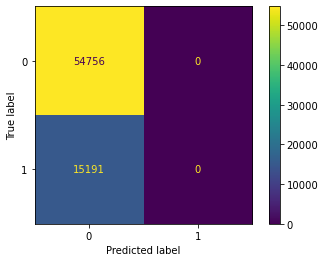



Accuracy:  0.7828212789683617
Precision:  0.0
Recall:  0.0
F1:  0.0
AUC:  0.5234482809702364


In [79]:
#Tune more hyperparameters, to check if the model will improve futher
dtc_3 = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state=10)

dtc_3.fit(X_train, y_train)

dtc_pred_3 = dtc.predict(X_test)
eval_model(dtc_3, X_test, y_test)

# Random Forest

In [80]:
#import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [81]:
#create a function to encode and split
def encode_and_split(df):
    df_dumm = pd.get_dummies(df, prefix_sep='_', drop_first=True)

    X = df_dumm.drop(['Loan_default'], axis=1)
    y = df_dumm['Loan_default']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [82]:
#Perform a train test split on the entire dataset
X_train, X_test, y_train, y_test = encode_and_split(df)

In [83]:
X_train.shape, X_test.shape

((186523, 92), (46631, 92))

In [84]:
#instantiate and fit the RandomForest model
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight="balanced")
rfc_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15)

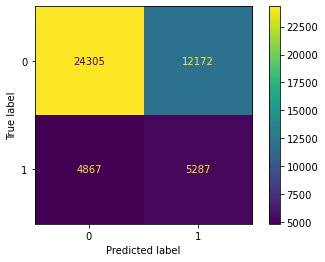



Accuracy:  0.6345993008942549
Precision:  0.3028237585199611
Recall:  0.5206815048256844
F1:  0.3829355738239235
AUC:  0.6383335366609525


In [85]:
eval_model(rfc_model, X_test, y_test)

The forest is overfitted, it will not generalize well on unseen data

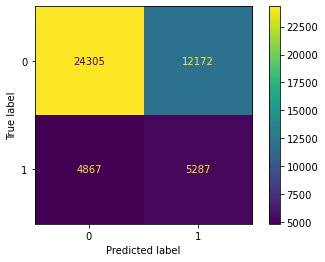



Accuracy:  0.6345993008942549
Precision:  0.3028237585199611
Recall:  0.5206815048256844
F1:  0.3829355738239235
AUC:  0.6383335366609525


In [86]:
#Tune parameters, still not great
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

# Conclusion

The best model seems to be the logistic regression model, based on the higher accuracy, and the AUC. 
The model will require more feature engineering to make better predictive analyis, of the target variable.